In [1]:
!pip install ultralytics roboflow --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127

In [4]:
from roboflow import Roboflow

# Initialize Roboflow (replace with your API key)
rf = Roboflow(api_key="01APKyukcSpt5N9nbgl6")  # Get API key from Roboflow settings
project = rf.workspace("indianfoodnet").project("indianfoodnet")
dataset = project.version(1).download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to IndianFoodNet-1 in yolov11:: 100%|██████████| 26084/26084 [00:09<00:00, 2735.15it/s]


In [ ]:
from ultralytics import YOLO

# Build from YAML and transfer weights
model = YOLO('yolo11s.pt')

# Train the model
results = model.train(
    data=f"{dataset.location}/data.yaml",  # Path to dataset config
    epochs=20,                            # Number of training epochs
    imgsz=640,                            # Image size
    batch=16,                             # Batch size (reduce if GPU OOM)
    device=0,                             # Use GPU (0) or CPU (-1)
    name="indian_food_yolo11s",           # Save results to this folder
    patience=5,
    seed=42                               # Reproducibility
)

100%|██████████| 18.4M/18.4M [00:00<00:00, 71.3MB/s]


Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/IndianFoodNet-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=indian_food_yolov8s, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0, plots=True, pose=1

100%|██████████| 755k/755k [00:00<00:00, 83.1MB/s]

Overriding model.yaml nc=80 with nc=30

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytic

 23        [16, 19, 22]  1    831018  ultralytics.nn.modules.head.Detect           [30, [128, 256, 512]]         
YOLO11s summary: 181 layers, 9,439,402 parameters, 9,439,386 gradients, 21.6 GFLOPs

Transferred 493/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 275MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1196.3±556.9 MB/s, size: 42.9 KB)


train: Scanning /content/IndianFoodNet-1/train/labels... 11387 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11387/11387 [00:05<00:00, 2199.54it/s]


train: New cache created: /content/IndianFoodNet-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 960.9±532.5 MB/s, size: 62.0 KB)


val: Scanning /content/IndianFoodNet-1/valid/labels... 1073 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1073/1073 [00:00<00:00, 1096.09it/s]

val: New cache created: /content/IndianFoodNet-1/valid/labels.cache


Plotting labels to runs/detect/indian_food_yolov8s/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000294, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/indian_food_yolov8s
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.08G     0.8441      2.378      1.311         33        640: 100%|██████████| 712/712 [04:02<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:12<00:00,  2.74it/s]

                   all       1073       1654      0.623       0.68       0.71      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.88G     0.7808      1.336      1.243         41        640: 100%|██████████| 712/712 [03:55<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:11<00:00,  3.07it/s]


                   all       1073       1654      0.687      0.628      0.697      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.91G     0.7781       1.24      1.244         35        640: 100%|██████████| 712/712 [03:52<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.11it/s]

                   all       1073       1654      0.701      0.664      0.735      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.96G     0.7627      1.159      1.234         50        640: 100%|██████████| 712/712 [03:52<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.11it/s]


                   all       1073       1654      0.758      0.695      0.775      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.99G     0.7294      1.053      1.209         30        640: 100%|██████████| 712/712 [03:51<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:11<00:00,  3.02it/s]


                   all       1073       1654      0.794       0.76      0.846      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      5.04G      0.705     0.9636      1.191         32        640: 100%|██████████| 712/712 [03:53<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.09it/s]

                   all       1073       1654      0.812      0.758      0.846      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      5.07G      0.683     0.8923      1.175         41        640: 100%|██████████| 712/712 [03:53<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:11<00:00,  3.05it/s]


                   all       1073       1654      0.823      0.758      0.848      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      5.12G     0.6745     0.8299      1.166         42        640: 100%|██████████| 712/712 [03:51<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:11<00:00,  3.01it/s]


                   all       1073       1654      0.844      0.794      0.885      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      5.15G     0.6638     0.7937      1.157         42        640: 100%|██████████| 712/712 [03:51<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:11<00:00,  3.01it/s]


                   all       1073       1654      0.846      0.827      0.894      0.766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      5.19G     0.6516      0.741      1.148         39        640: 100%|██████████| 712/712 [03:50<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:11<00:00,  3.04it/s]


                   all       1073       1654      0.874      0.821      0.899      0.773
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      5.24G     0.5798      0.544      1.136         16        640: 100%|██████████| 712/712 [03:47<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:11<00:00,  3.04it/s]


                   all       1073       1654      0.877       0.81      0.894      0.764

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      5.28G     0.5553     0.5075      1.112         16        640: 100%|██████████| 712/712 [03:44<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:11<00:00,  3.06it/s]


                   all       1073       1654      0.879       0.83      0.901      0.781

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      5.31G     0.5457     0.4495      1.104         18        640: 100%|██████████| 712/712 [03:43<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:11<00:00,  3.08it/s]

                   all       1073       1654      0.885      0.862      0.919      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      5.35G     0.5258     0.4104      1.083         16        640: 100%|██████████| 712/712 [03:45<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.11it/s]


                   all       1073       1654      0.893      0.848      0.918      0.811

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      5.39G     0.5139     0.3862      1.075         14        640: 100%|██████████| 712/712 [03:43<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.27it/s]


                   all       1073       1654       0.89      0.865      0.926      0.809

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      5.43G     0.4995     0.3569      1.065         22        640: 100%|██████████| 712/712 [03:44<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.15it/s]

                   all       1073       1654      0.906      0.862      0.924      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      5.47G     0.4852     0.3286      1.051         15        640: 100%|██████████| 712/712 [03:45<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:11<00:00,  3.08it/s]


                   all       1073       1654      0.915      0.866      0.928      0.821

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      5.51G     0.4698     0.3024      1.039         17        640: 100%|██████████| 712/712 [03:43<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.11it/s]


                   all       1073       1654      0.935      0.861      0.934      0.838

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      5.55G     0.4563     0.2862      1.027         11        640: 100%|██████████| 712/712 [03:43<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:10<00:00,  3.11it/s]


                   all       1073       1654      0.903      0.871      0.932      0.835

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      5.59G     0.4459     0.2673      1.021         14        640: 100%|██████████| 712/712 [03:43<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:11<00:00,  3.09it/s]


                   all       1073       1654       0.92       0.88      0.935      0.841

20 epochs completed in 1.337 hours.
Optimizer stripped from runs/detect/indian_food_yolov8s/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/indian_food_yolov8s/weights/best.pt, 19.2MB

Validating runs/detect/indian_food_yolov8s/weights/best.pt...
Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,424,410 parameters, 0 gradients, 21.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:12<00:00,  2.66it/s]


                   all       1073       1654      0.914      0.886      0.935      0.841
              AlooGobi         39         40      0.824      0.875      0.888      0.829
            AlooMasala         39         39      0.864      0.897      0.926       0.91
               Bhatura         44         87      0.954      0.897      0.956      0.861
          BhindiMasala         43         45          1      0.954       0.98      0.929
               Biryani         42         45      0.976       0.92      0.963      0.909
                  Chai         39         60      0.936       0.85      0.943      0.741
                 Chole         70         72       0.95      0.958      0.973      0.899
        CoconutChutney         53         57      0.796      0.877      0.904      0.813
                   Dal         44         45      0.953      0.911      0.937      0.906
                  Dosa         38         75      0.975      0.773      0.877      0.769
               DumAlo

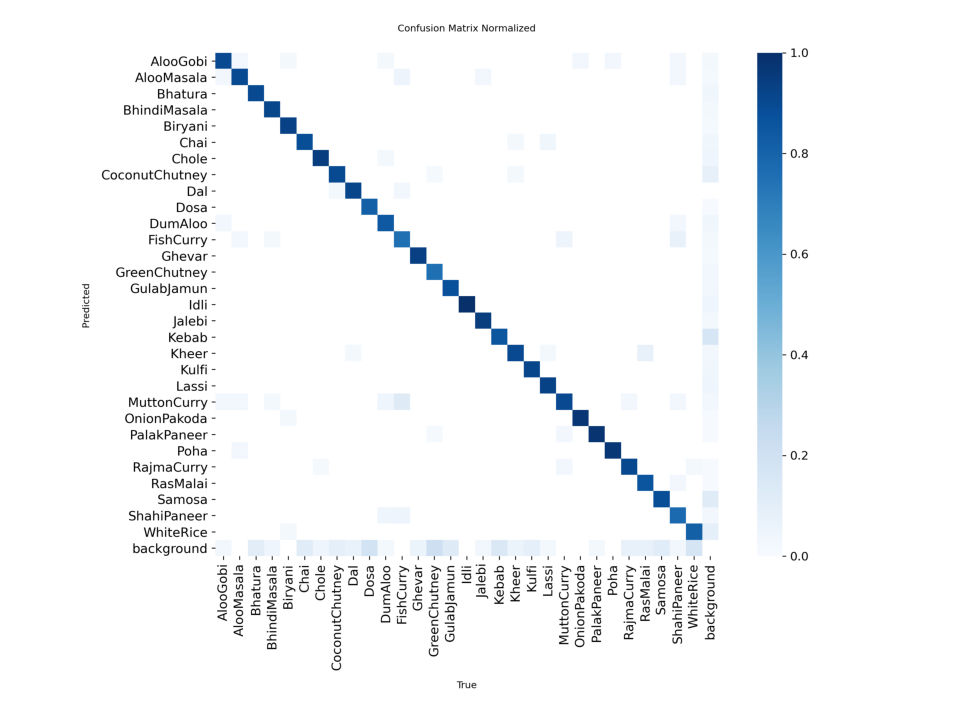

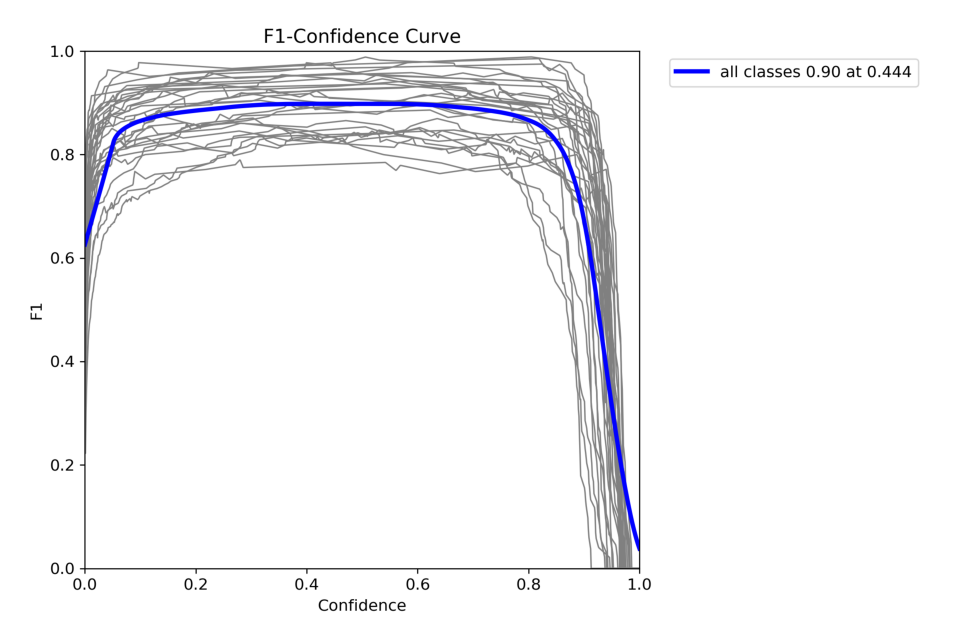

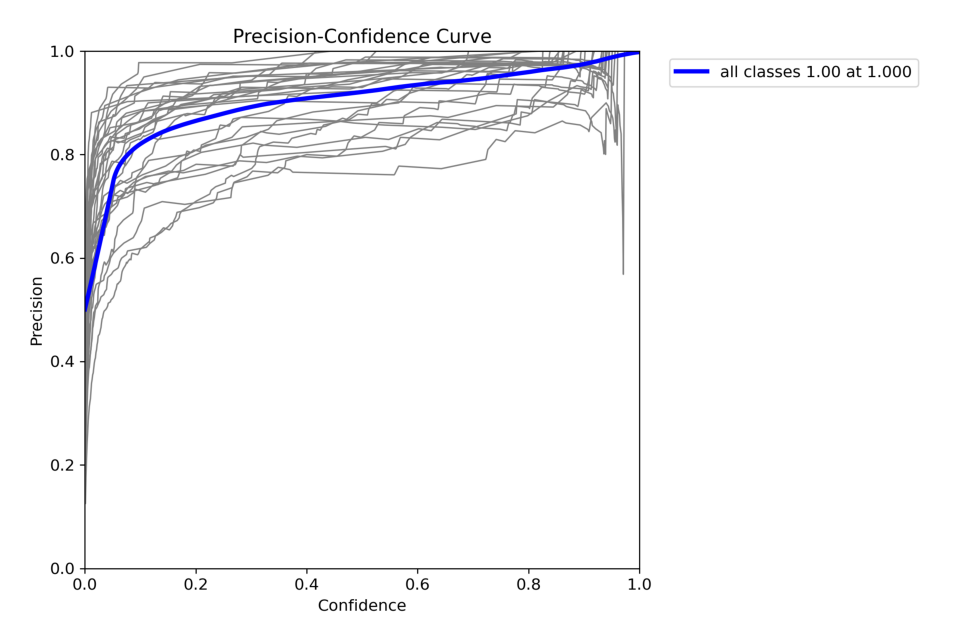

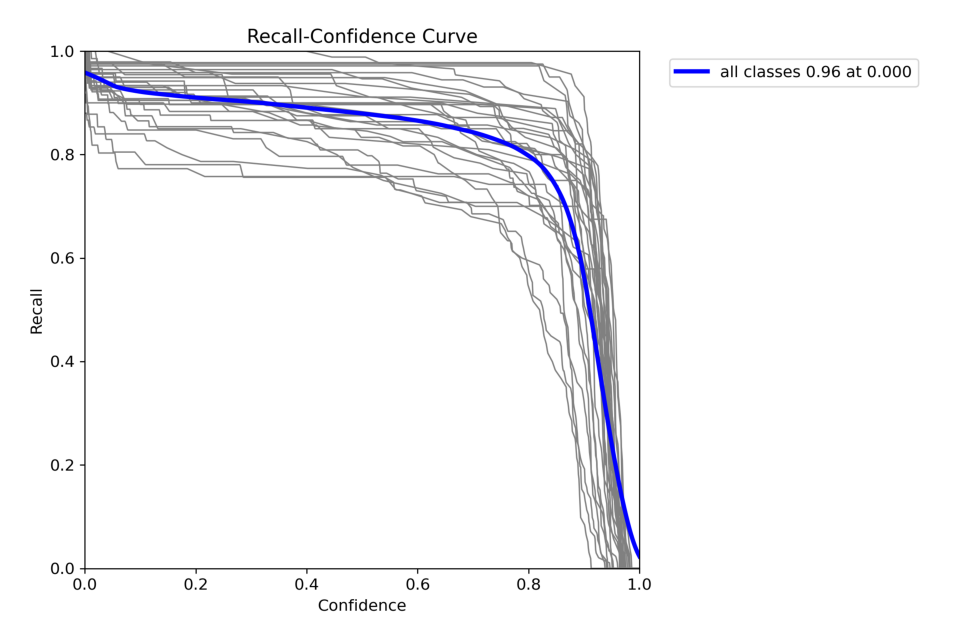

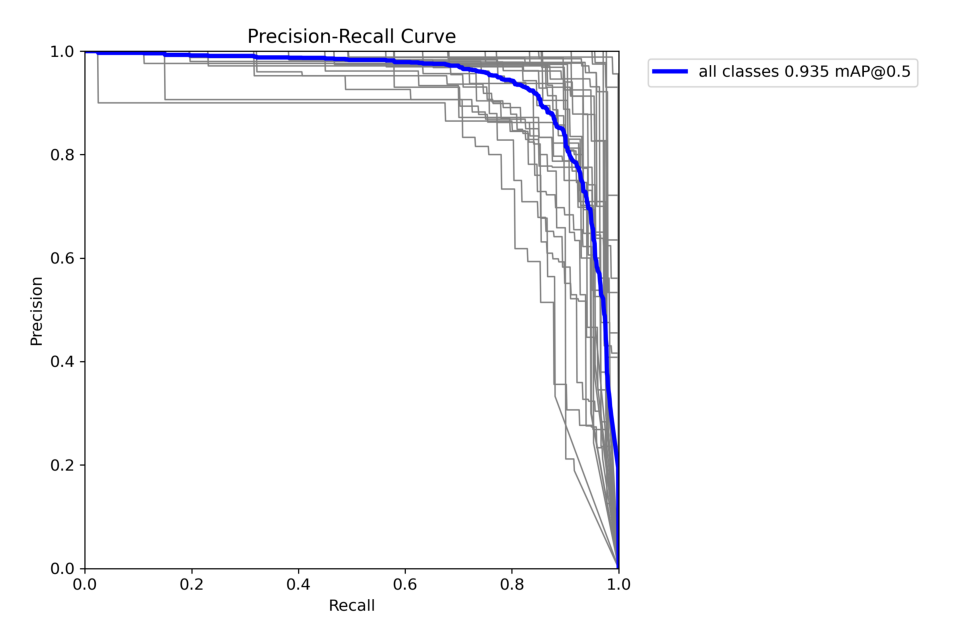

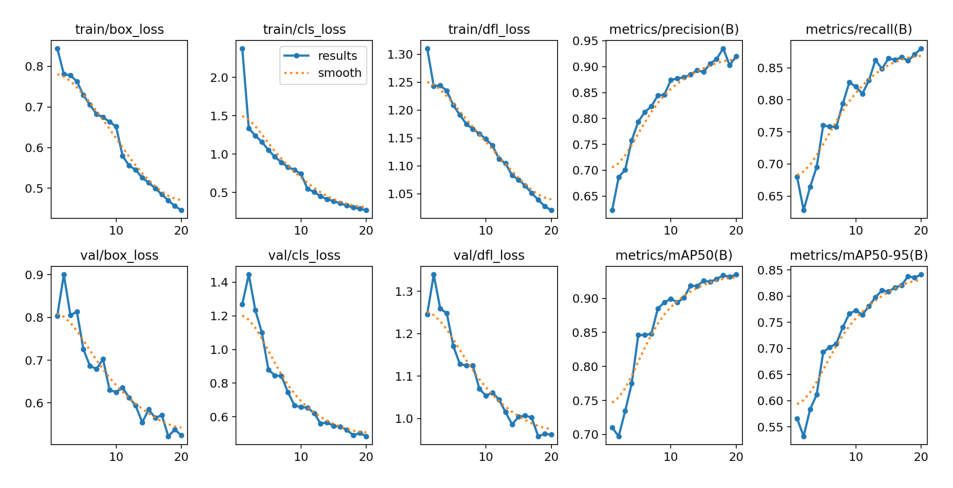

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = '/content/runs/detect/indian_food_yolo11s'

# Display the images
display_images(post_training_files_path, image_files)

#Loading the best model

In [2]:
from ultralytics import YOLO
path_to_yolo_model = '/content/best.pt' # Adjust this path to your saved .pt file

print("Loading the YOLO11 model...")
# When you load a YOLO model from a .pt file, it automatically loads the
# class names that were defined in your data.yaml during its training.
model = YOLO(path_to_yolo_model)
print("Done!")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Loading the YOLO11 model...
Done!


#Evaluation on test set

In [5]:
metrics = model.val(data=f"{dataset.location}/data.yaml",split = 'test')

# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11s summary (fused): 100 layers, 9,424,410 parameters, 0 gradients, 21.4 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 34.3MB/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1297.5±385.3 MB/s, size: 47.7 KB)



val: Scanning /content/IndianFoodNet-1/test/labels... 576 images, 0 backgrounds, 0 corrupt: 100%|██████████| 576/576 [00:00<00:00, 1877.49it/s]

val: New cache created: /content/IndianFoodNet-1/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [07:43<00:00, 12.88s/it]


                   all        576        903      0.917      0.876      0.924      0.834
              AlooGobi         21         21          1      0.832      0.972      0.948
            AlooMasala         20         20      0.907      0.976      0.981      0.943
               Bhatura         21         42      0.906      0.917      0.914      0.829
          BhindiMasala         25         25          1      0.953      0.995      0.956
               Biryani         24         24      0.942      0.917      0.936      0.871
                  Chai         22         33          1      0.895      0.968      0.789
                 Chole         40         42      0.974      0.875      0.952      0.859
        CoconutChutney         30         33      0.955      0.939      0.975      0.893
                   Dal         21         21          1      0.991      0.995       0.96
                  Dosa         20         29      0.995      0.931      0.965      0.828
               DumAlo


image 1/1 /content/IndianFoodNet-1/test/images/R-1-_jpg.rf.9820dec0f4509d4af532a04edaba9b31.jpg: 640x640 1 BhindiMasala, 536.1ms
Speed: 3.4ms preprocess, 536.1ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/IndianFoodNet-1/test/images/on-corner-chhole-bhature0_jpg.rf.968c4d1cdda886dcbbf111662893dc87.jpg: 640x640 2 Bhaturas, 1 Chole, 506.7ms
Speed: 2.9ms preprocess, 506.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/IndianFoodNet-1/test/images/nadan-mutton-curry_jpg.rf.76f6473033297e3b93198ccb0e820326.jpg: 640x640 1 MuttonCurry, 508.3ms
Speed: 2.9ms preprocess, 508.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/IndianFoodNet-1/test/images/R-9-_jpg.rf.de529028d6a784f95d743f533b4d8360.jpg: 640x640 1 DumAloo, 507.3ms
Speed: 2.9ms preprocess, 507.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/IndianFoodNet-1/test/images/DSC235

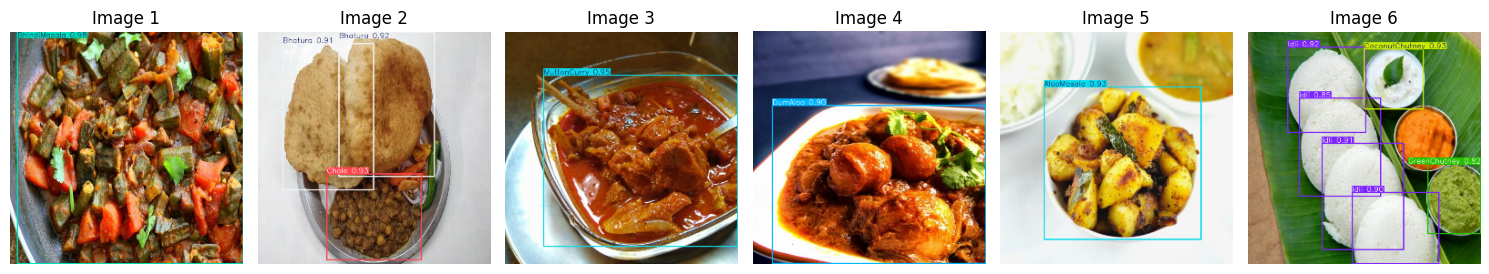

In [6]:
import glob
import matplotlib.pyplot as plt
import cv2

# Get all test images
test_images = glob.glob(f"{dataset.location}/test/images/*.jpg")[10:16]

# Prepare a list to store processed images
predicted_images = []

# Run inference and store resized images
for image_path in test_images:
    results = model.predict(image_path, conf=0.5)
    result_image_bgr = results[0].plot()
    result_image_rgb = cv2.cvtColor(result_image_bgr, cv2.COLOR_BGR2RGB)

    # Resize the image to a fixed size (e.g., 256x256)
    resized_image = cv2.resize(result_image_rgb, (256, 256))
    predicted_images.append(resized_image)

# Plot all images in one row
plt.figure(figsize=(15, 5))
for i, img in enumerate(predicted_images):
    plt.subplot(1, len(predicted_images), i+1)
    plt.imshow(img)
    plt.title(f"Image {i+1}")
    plt.axis("off")
plt.tight_layout()
plt.show()

#Testing using random images from the internet

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 # OpenCV for image reading and drawing
from ultralytics import YOLO

# --- 3. Prediction Function for YOLOv8 (using built-in rendering) ---
def predict_image_yolo(filename, yolo_model, confidence_threshold=0.5):
    """
    Predicts objects in an image using a YOLOv8 model and displays the results.
    This version uses YOLOv8's built-in plot() for accurate bounding box rendering.

    Args:
        filename (str): Path to the image file.
        yolo_model (YOLO): Loaded YOLOv8 model.
        confidence_threshold (float): Minimum confidence score to display a detection.
    """
    print(f"Predicting on: {filename}")

    # Run inference
    results = yolo_model(filename)

    # Filter boxes manually (optional, plot() will show all by default)
    boxes = results[0].boxes
    filtered_boxes = [box for box in boxes if float(box.conf) >= confidence_threshold]

    if not filtered_boxes:
        print("No objects detected above threshold.")
    else:
        # Render the prediction using YOLOv8's built-in visualization
        annotated_image_bgr = results[0].plot()  # This returns an image with boxes drawn (BGR)
        annotated_image_rgb = cv2.cvtColor(annotated_image_bgr, cv2.COLOR_BGR2RGB)  # Convert to RGB

        # Display using matplotlib
        plt.figure(figsize=(6, 6))
        plt.imshow(annotated_image_rgb)
        plt.title(f"YOLO11 Predictions (Conf > {confidence_threshold})")
        plt.axis('off')
        plt.show()


Predicting on: /content/samosa-recipe.webp

image 1/1 /content/samosa-recipe.webp: 640x640 5 Samosas, 696.6ms
Speed: 16.6ms preprocess, 696.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


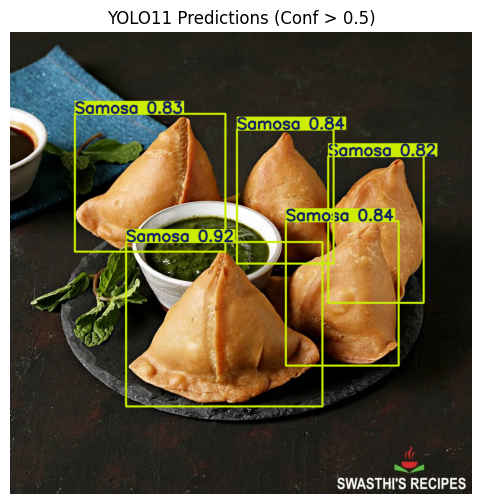

In [11]:
test_image_path = '/content/samosa-recipe.webp'

predict_image_yolo(test_image_path, model, confidence_threshold=0.5) # Adjust confidence as needed

Predicting on: /content/gulab-jamun.jpg

image 1/1 /content/gulab-jamun.jpg: 640x448 8 GulabJamuns, 567.8ms
Speed: 3.7ms preprocess, 567.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 448)


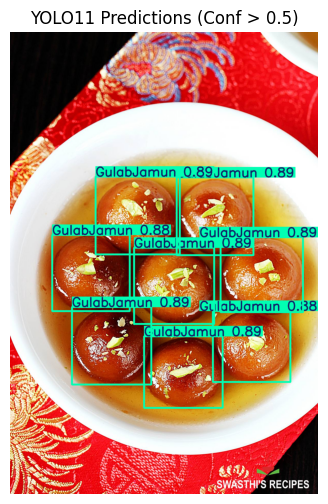

In [12]:
test_image_path = '/content/gulab-jamun.jpg'

predict_image_yolo(test_image_path, model, confidence_threshold=0.5) # Adjust confidence as needed

Predicting on: /content/Idli.webp

image 1/1 /content/Idli.webp: 640x640 1 CoconutChutney, 4 Idlis, 533.1ms
Speed: 5.6ms preprocess, 533.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


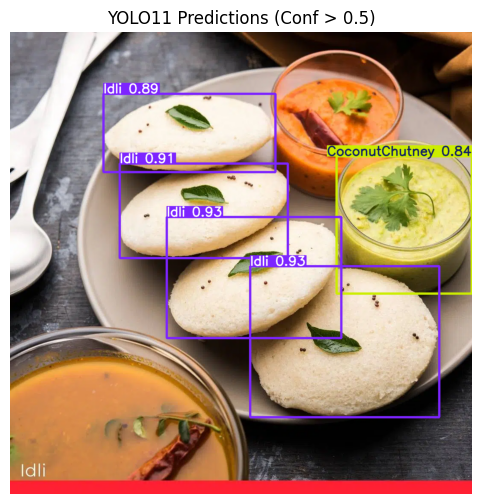

In [13]:
test_image_path = '/content/Idli.webp'

predict_image_yolo(test_image_path, model, confidence_threshold=0.5) # Adjust confidence as needed

Predicting on: /content/Idli Dosa Batter in MIxie.jpg

image 1/1 /content/Idli Dosa Batter in MIxie.jpg: 608x640 1 CoconutChutney, 1 Dosa, 4 Idlis, 1899.2ms
Speed: 7.0ms preprocess, 1899.2ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 640)


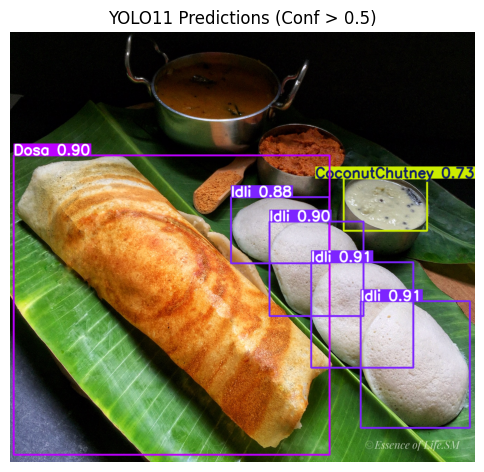

In [14]:
test_image_path = '/content/Idli Dosa Batter in MIxie.jpg'

predict_image_yolo(test_image_path, model, confidence_threshold=0.5) # Adjust confidence as needed